# Business Understanding
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

# Business Objective
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score,precision_score, recall_score, roc_auc_score,roc_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 300) # to display all the columns
pd.set_option('display.max_rows', 300) # to display all the rows
pd.set_option('display.width', 1000)

## Read and Load the data

In [3]:
dataframe=pd.read_csv('Lead Scoring Assignment/Leads.csv')

In [4]:
dataframe.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
dataframe.shape

(9240, 37)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Find Missing Columns
- Delete data which has more than 40% missing data
- for remaining columns
    - if continuous variable- do boxplot to identify the outlier
        - if not outlier then use mean
        - if outlier then median
        - if categorical, do mode


In [7]:
def find_missing():
    total_missing=(dataframe.isna().sum()/dataframe.shape[0])*100
    return(total_missing[total_missing>0])

find_missing()

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.367965
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.6493

In [8]:
def unique_vals(dataframe):
    for i in dataframe.columns:
        print(i)
        print(dataframe[i].value_counts(normalize=True, sort=True)*100)
        print('')
unique_vals(dataframe)

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.010823
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.010823
46befc49-253a-419b-abea-2fd978d2e2b1    0.010823
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.010823
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.010823
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.010823
644099a2-3da4-4d23-9546-7676340a372b    0.010823
2a093175-415b-4321-9e69-ed8d9df65a3c    0.010823
c66249a3-8500-4c66-a511-312d914573de    0.010823
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.010823
Name: Prospect ID, Length: 9240, dtype: float64

Lead Number
660737    0.010823
603303    0.010823
602561    0.010823
602557    0.010823
602540    0.010823
            ...   
630422    0.010823
630405    0.010823
630403    0.010823
630390    0.010823
579533    0.010823
Name: Lead Number, Length: 9240, dtype: float64

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Im

In [9]:
# the SELECT seems to be the category when people actually donot select anything we will convert the selects to NUll
dataframe=dataframe.replace('Select',np.nan)

In [10]:
unique_vals(dataframe)

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.010823
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.010823
46befc49-253a-419b-abea-2fd978d2e2b1    0.010823
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.010823
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.010823
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.010823
644099a2-3da4-4d23-9546-7676340a372b    0.010823
2a093175-415b-4321-9e69-ed8d9df65a3c    0.010823
c66249a3-8500-4c66-a511-312d914573de    0.010823
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.010823
Name: Prospect ID, Length: 9240, dtype: float64

Lead Number
660737    0.010823
603303    0.010823
602561    0.010823
602557    0.010823
602540    0.010823
            ...   
630422    0.010823
630405    0.010823
630403    0.010823
630390    0.010823
579533    0.010823
Name: Lead Number, Length: 9240, dtype: float64

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Im

###  Search for column where 1 categorry has more than 95% of the data, will drop these columns

- Do Not Call
- Country
- What matters most to you in choosing a course
- Search
- Magazine
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

In [11]:
drop_columns=['Do Not Call'
,'Country'
,'What matters most to you in choosing a course'
,'Search'
,'Magazine'
,'Newspaper Article'
,'X Education Forums'
,'Newspaper'
,'Digital Advertisement'
,'Through Recommendations'
,'Receive More Updates About Our Courses'
,'Update me on Supply Chain Content'
,'Get updates on DM Content'
,'I agree to pay the amount through cheque'
,'Lead Number']

dataframe.drop(drop_columns, axis=1, inplace=True)

In [12]:
find_missing()

Lead Source                            0.389610
TotalVisits                            1.482684
Page Views Per Visit                   1.482684
Last Activity                          1.114719
Specialization                        36.580087
How did you hear about X Education    78.463203
What is your current occupation       29.112554
Tags                                  36.287879
Lead Quality                          51.590909
Lead Profile                          74.188312
City                                  39.707792
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

In [13]:
#  drop columns whith more than 40% missing values
drop_columns=['Asymmetrique Activity Index'
,'Asymmetrique Profile Index'
,'Asymmetrique Activity Score'
,'Asymmetrique Profile Score'
, 'Lead Quality'
,'Lead Profile'
,'How did you hear about X Education']

dataframe.drop(drop_columns, axis=1, inplace=True)

In [14]:
# Google appears twice with different cases. Hence we shall convert all rows with value "Google" to the same case.
dataframe['Lead Source'] = dataframe['Lead Source'].replace('google', 'Google')

### Imputing the Missing values with mean, median, mode

In [15]:
dataframe['Lead Source'].value_counts(dropna=False)
dataframe['Lead Source'].fillna(dataframe['Lead Source'].mode()[0], inplace=True)

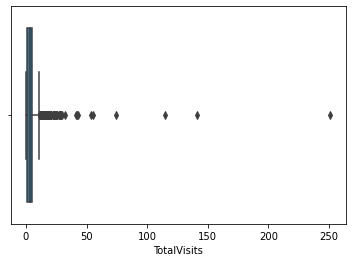

In [16]:
sns.boxplot(dataframe['TotalVisits'])
#  has outlier so convert to median
dataframe['TotalVisits'].fillna(dataframe['TotalVisits'].median(), inplace=True)

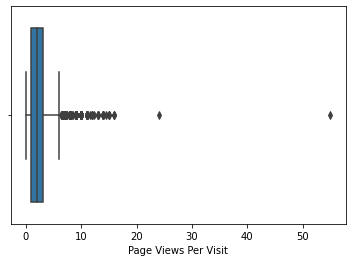

In [17]:
sns.boxplot(dataframe['Page Views Per Visit'])
#  has outlier so convert to median
dataframe['Page Views Per Visit'].fillna(dataframe['Page Views Per Visit'].median(), inplace=True)


In [18]:
# Last Activity                 1.482684
dataframe['Last Activity'].value_counts(dropna=False)
dataframe['Last Activity'].fillna(dataframe['Last Activity'].mode()[0], inplace=True)

In [19]:
dataframe['Specialization'].value_counts(dropna=False)
#  NAN is the higest containing the max data ... imputing it with the next available high value will make it bias we will keep it as is 
dataframe['Specialization'].replace(np.nan, 'Not Provided', inplace=True)

In [20]:
dataframe['What is your current occupation'].value_counts(dropna=False)
#  NAN is the 2nd highest containing data ... imputing it with the next available high value will make it bias we will keep it as is 
dataframe['What is your current occupation'].replace(np.nan, 'Not Provided', inplace=True)

In [21]:
dataframe['Tags'].value_counts(dropna=False)
#  NAN is the higest containing the max data ... imputing it with the next available high value will make it bias we will keep it as is 
dataframe['Tags'].replace(np.nan, 'Not Provided', inplace=True)

In [22]:
dataframe['City'].value_counts(dropna=False)
#  NAN is the higest containing the max data ... imputing it with the next available high value will make it bias we will keep it as is 
dataframe['City'].replace(np.nan, 'Not Provided', inplace=True)

In [23]:
find_missing()

Series([], dtype: float64)

## Lets perform univariate analysis on the columns

In [24]:
numeric_columns=dataframe._get_numeric_data()

In [25]:
#  define a function to display a displt,and boxplot for numerical data
def dist_box_numerical_col(table_name, numerical_cols):
    for col in numerical_cols:
        print(col)
        plt.figure(figsize=[15,5])
        plt.subplot(1,2,1)
        sns.distplot(table_name[col],kde=True)

        plt.subplot(1,2,2)
        sns.boxplot(table_name[col])
        plt.show()

Converted


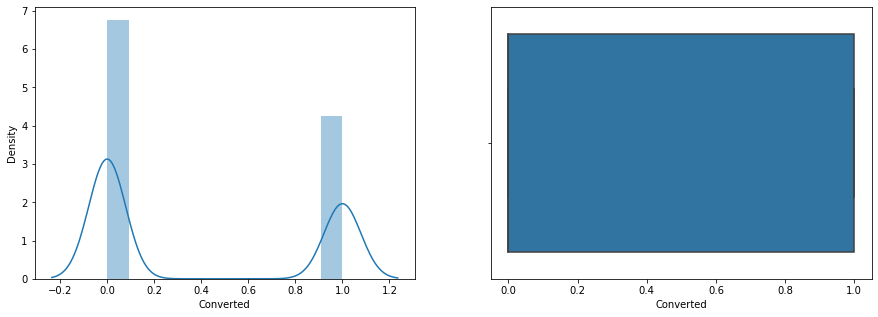

TotalVisits


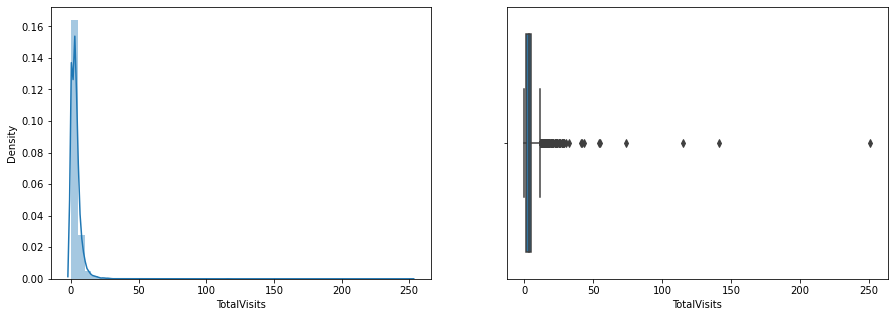

Total Time Spent on Website


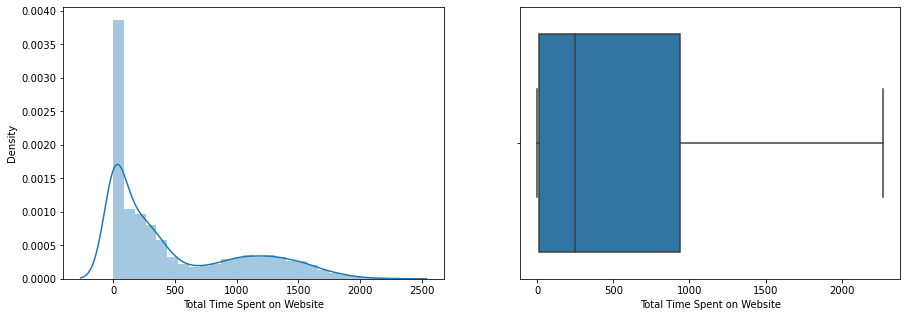

Page Views Per Visit


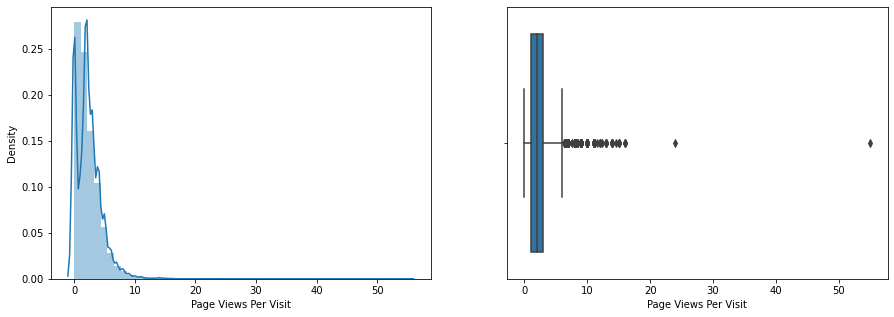

In [26]:
dist_box_numerical_col(dataframe, numeric_columns)

There are outliers in
- TotalVisits
- Page Views Per Visit

let us remove the extreme outliers

In [27]:
q=dataframe['TotalVisits'].quantile(.99)
dataframe= dataframe[dataframe['TotalVisits']<q]

In [28]:
q=dataframe['Page Views Per Visit'].quantile(.99)
dataframe= dataframe[dataframe['Page Views Per Visit']<q]

In [29]:
dataframe.shape

(9029, 15)

Converted


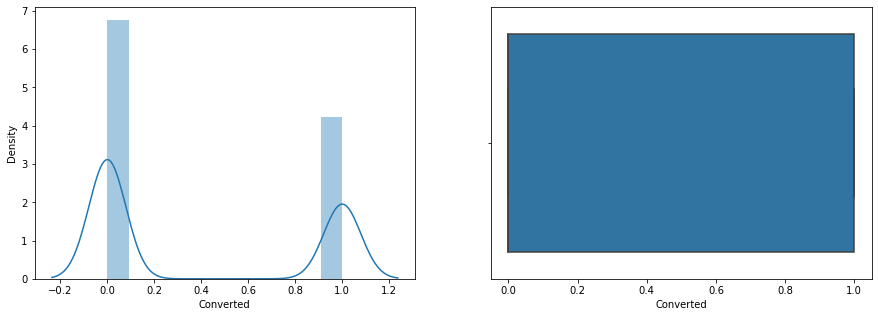

TotalVisits


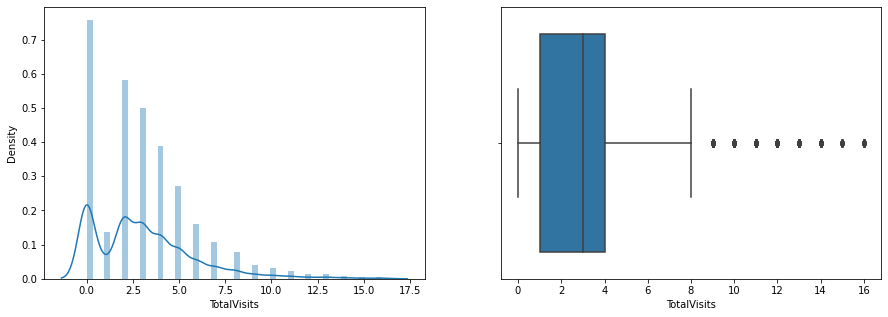

Total Time Spent on Website


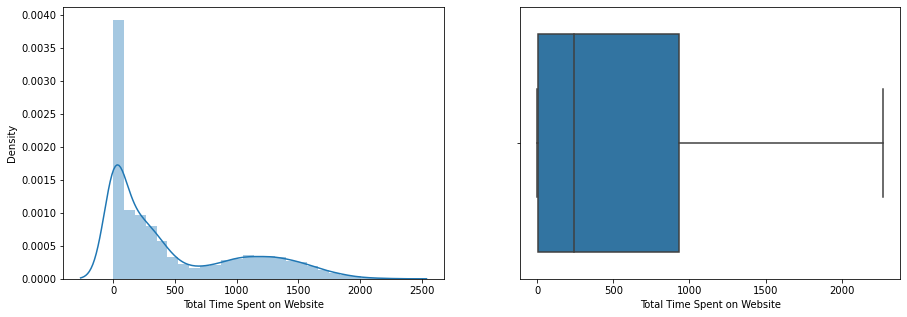

Page Views Per Visit


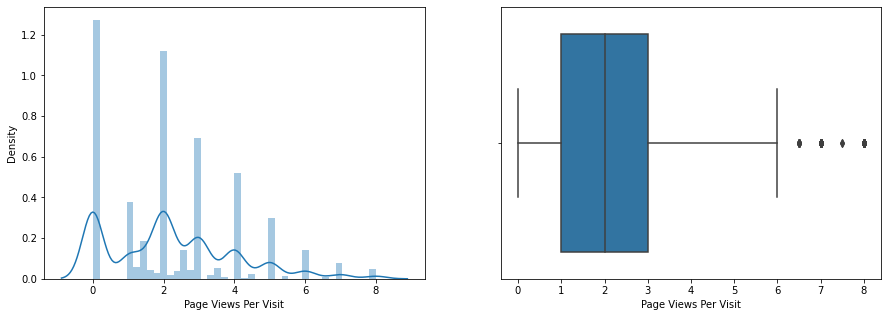

In [30]:
dist_box_numerical_col(dataframe, numeric_columns)

In [31]:
numeric_columns=dataframe._get_numeric_data()
categorical_column=list(set(dataframe.columns)-set(numeric_columns))
categorical_column.remove('Prospect ID')

In [32]:
# define function for categorical data
def count_bar_categorical_col(table_name,categorcial_cols, hue_col):
  
    for col in categorcial_cols:
        print(col)
        plt.figure(figsize=[20,5])
        plt.subplot(1,2,1)
        
        ax=sns.countplot(data=table_name, x=col, hue=hue_col,order=table_name[col].value_counts().index )
        plt.xticks(rotation=90)
        for p in ax.patches:
            height = p.get_height()
            ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,s="{0:.1f}%".format((height/len(table_name)*100)),ha='center')
        plt.title(f"{col}")

        plt.subplot(1,2,2)
        convert_percent=(table_name[[col, hue_col]].groupby([col],as_index=False).mean())
        sns.barplot( x = col, y=hue_col,order=convert_percent[col].value_counts().index, data=convert_percent)
        plt.xticks(rotation=90)
        plt.show()



Specialization


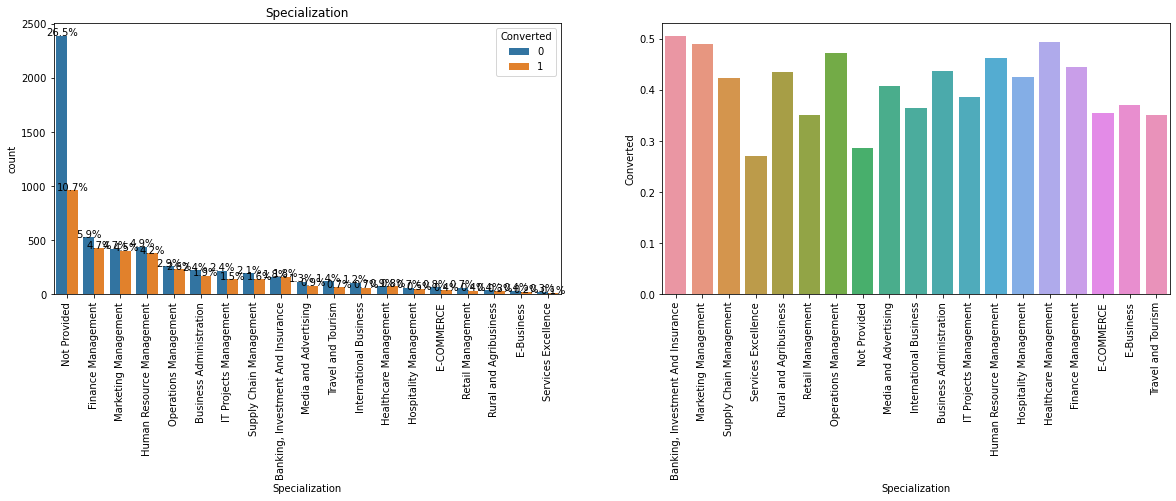

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


Last Notable Activity


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


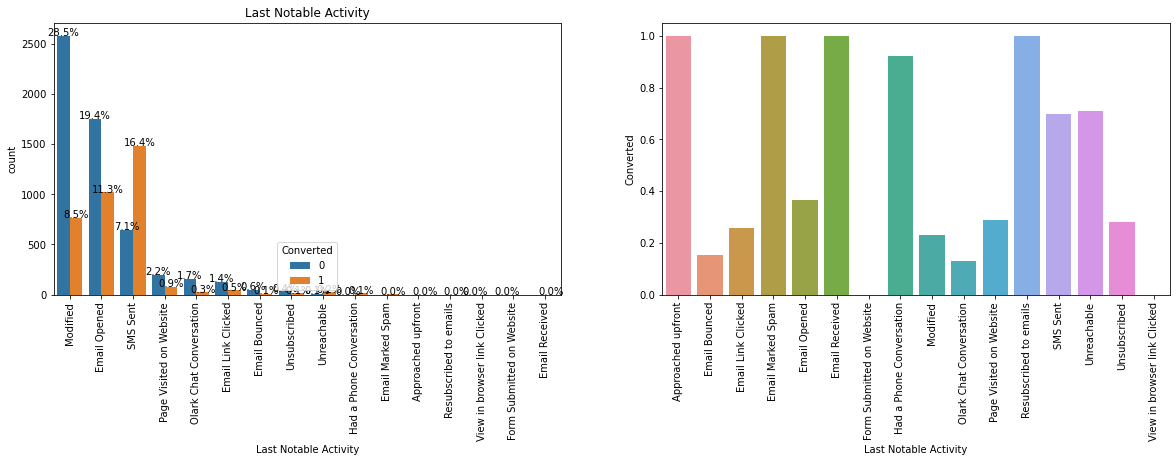

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


Tags


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


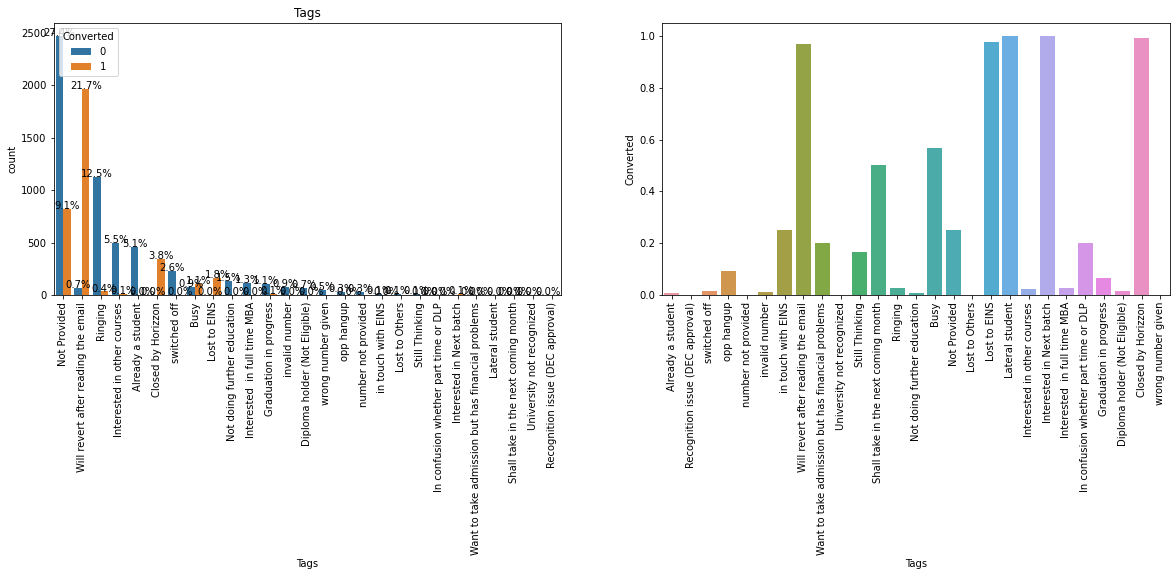

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


Lead Source


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


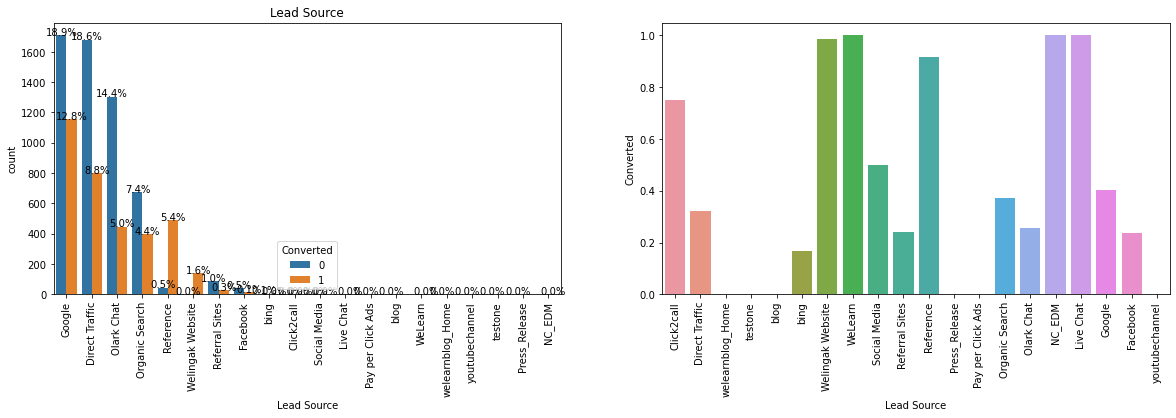

posx and posy should be finite values
posx and posy should be finite values


What is your current occupation


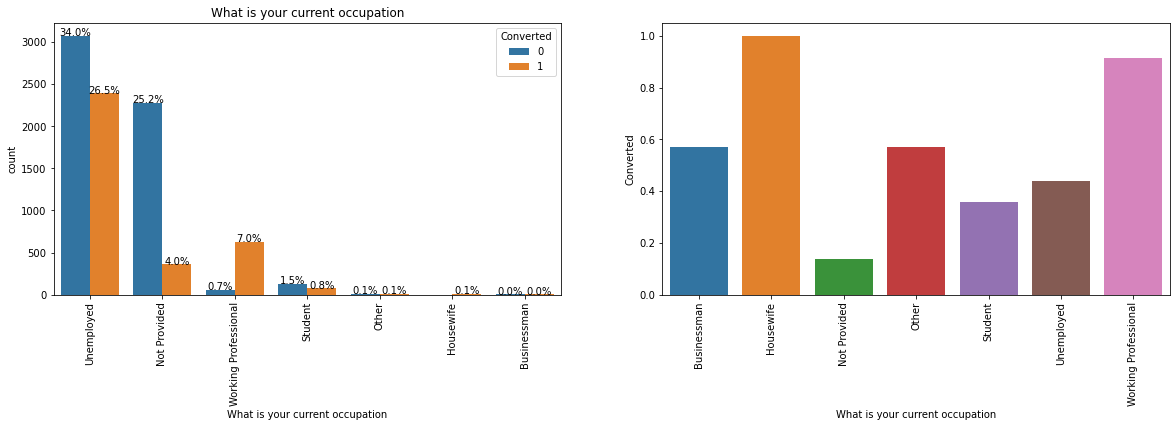

A free copy of Mastering The Interview


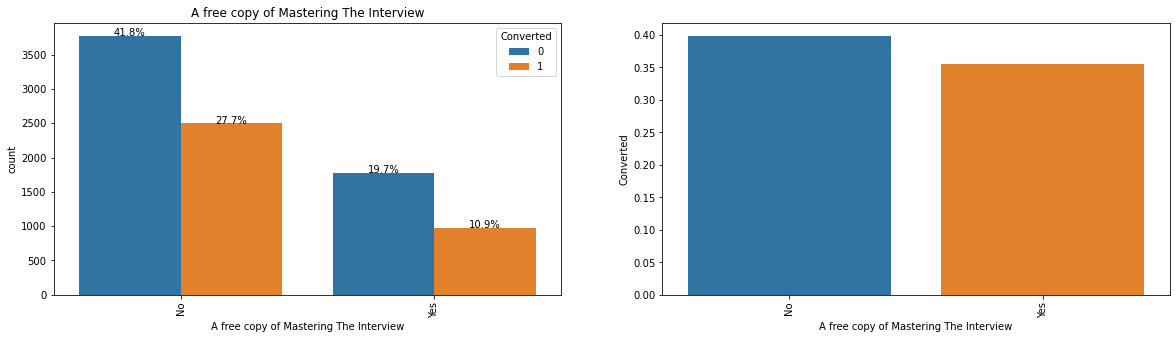

Last Activity


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


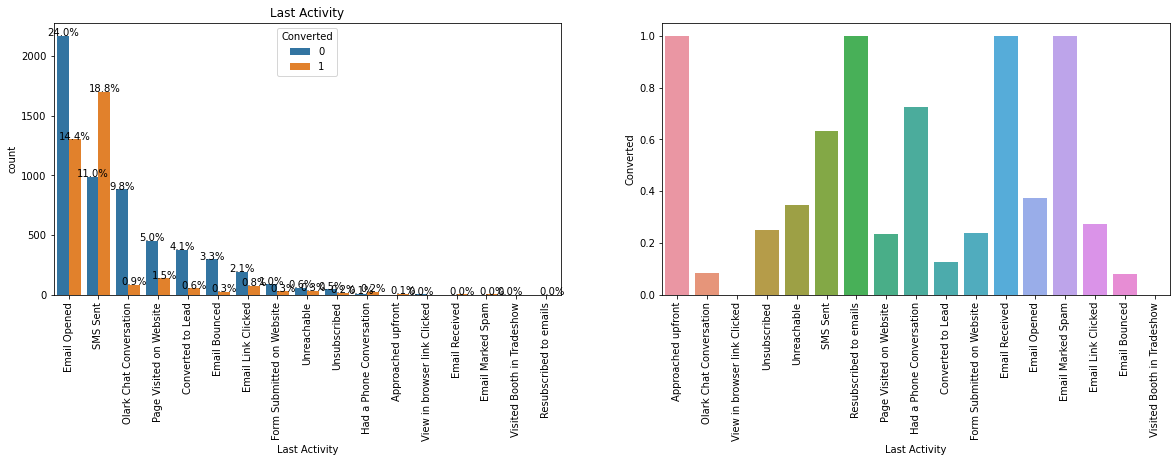

Do Not Email


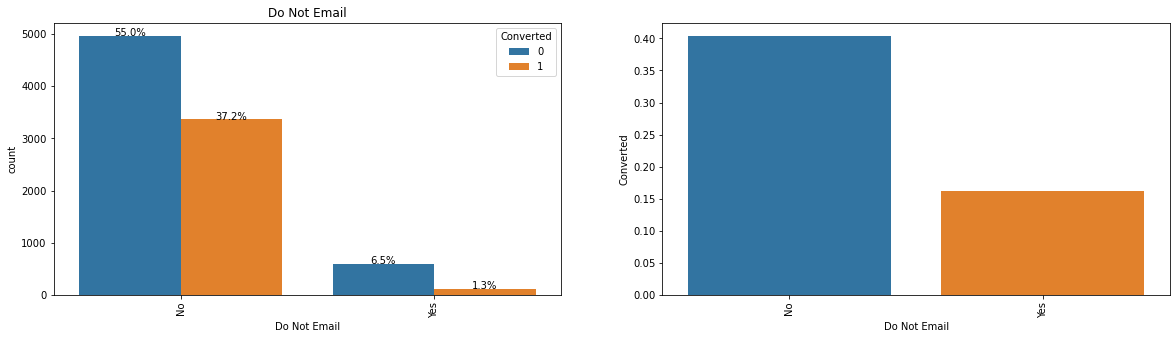

City


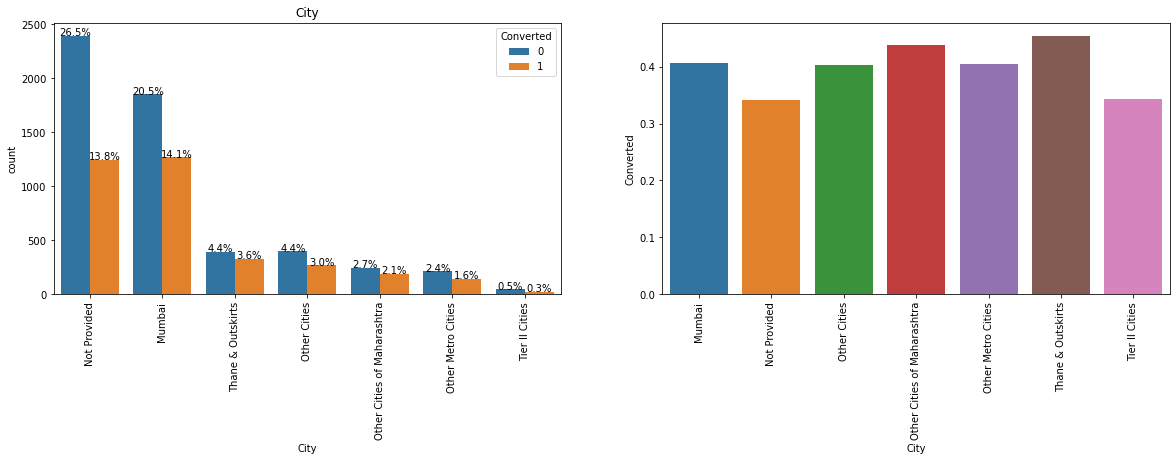

Lead Origin


posx and posy should be finite values
posx and posy should be finite values


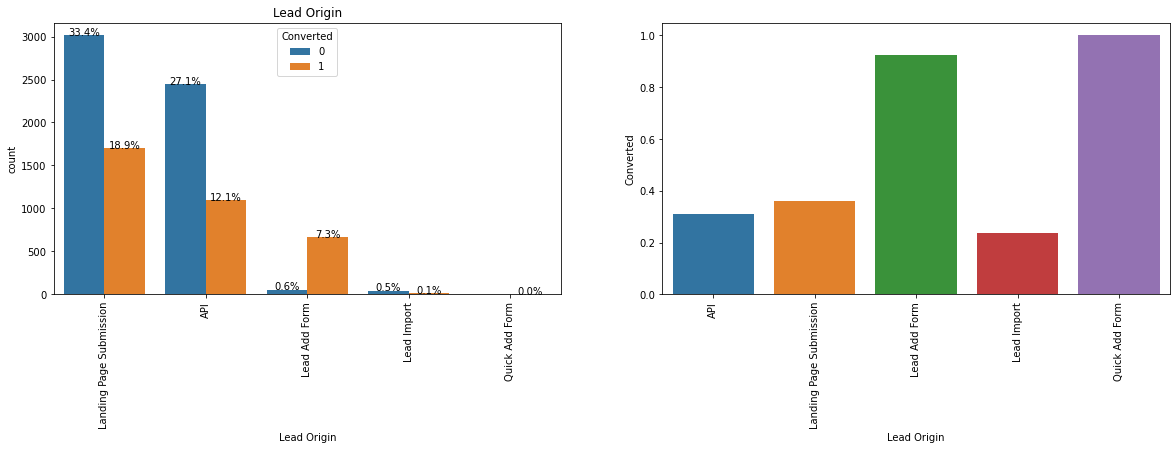

In [33]:
count_bar_categorical_col(dataframe, categorical_column, 'Converted')

In [34]:
# Replace the less frequently occuring categories  (<1%)to Others
c=['Facebook',
   'bing',
   'Click2call',
   'Social Media',
   'Live Chat', 
   'Press_Release' , 
   'Pay per Click Ads',
   'blog',
   'WeLearn'  ,
   'welearnblog_Home', 
   'youtubechannel' ,
   'testone'   ,
   'NC_EDM'      ]
dataframe['Lead Source'] = dataframe['Lead Source'].replace(c,'Others')

In [35]:
# Last Notable Activity: Replace the less frequently occuring categories  (<1%)to others
c=['Email Bounced', 
   'Unsubscribed', 
   'Unreachable', 
   'Had a Phone Conversation', 
   'Email Marked Spam',
   'Approached upfront',
   'Resubscribed to emails',
   'View in browser link Clicked',
   'Form Submitted on Website',
   'Email Received']
dataframe['Last Notable Activity'] = dataframe['Last Notable Activity'].replace(c,'Others')

In [36]:
# Convert Management Specialization to a single category
c=['Finance Management',
   'Marketing Management',
   'Human Resource Management', 
   'Operations Management',
   'IT Projects Management',  
   'Supply Chain Management',
   'Healthcare Management' ,  
   'Hospitality Management', 
   'Retail Management' ]
dataframe['Specialization'] = dataframe['Specialization'].replace(c,'Management Sector')

In [37]:
# Last Activity: Replace the less frequently occuring categories  (<1%)to others
c=['Unreachable',
   'Unsubscribed', 
   'Had a Phone Conversation', 
   'Approached upfront',
   'View in browser link Clicked',
   'Email Received',
   'Email Marked Spam',
   'Visited Booth in Tradeshow',
   'Resubscribed to emails']
dataframe['Last Activity'] = dataframe['Last Activity'].replace(c,'Others')

In [38]:
#  For Tags, group the columns which have less than 1.5% dat
c=['invalid number',
   'Diploma holder (Not Eligible)',
   'wrong number given',
   'opp hangup',
   'number not provided',
   'in touch with EINS',
   'Lost to Others',
   'Still Thinking',
   'Want to take admission but has financial problems',
   'In confusion whether part time or DLP',
   'Interested in Next batch',
   'Lateral student',
   'Shall take in the next coming month',
   'University not recognized',
   'Recognition issue (DEC approval)', 
   'Not doing further education',
   'Interested  in full time MBA',
   'Graduation in progress'
#    follown go columns have almost 0 conversion rate 
   ,'Ringing'
   ,'Already a student'
   ,'Interested in other courses'
   ,'switched off']
dataframe['Tags'] = dataframe['Tags'].replace(c,'Others')

In [39]:
# Convert yes and no to 0,1
dataframe['Do Not Email']=dataframe['Do Not Email'].map( lambda x: 1 if x=='Yes' else 0)
dataframe['A free copy of Mastering The Interview']=dataframe['A free copy of Mastering The Interview'].map( lambda x: 1 if x=='Yes' else 0)

In [40]:
# Change the datatype 
dataframe['TotalVisits']=dataframe['TotalVisits'].astype(int)
dataframe['Page Views Per Visit']=dataframe['Page Views Per Visit'].astype(int)

In [41]:
#rename columsn for better readability
dataframe.rename(columns={'Tags':'Connect_Info',
                          'A free copy of Mastering The Interview':'Freebee_received', 
                          'What is your current occupation':'current_occupation',
                          'Total Time Spent on Website':'Total Time Spent'}, inplace=True)


In [42]:
numeric_columns=dataframe._get_numeric_data()
categorical_column=list(set(dataframe.columns)-set(numeric_columns))
categorical_column.remove('Prospect ID')

Specialization


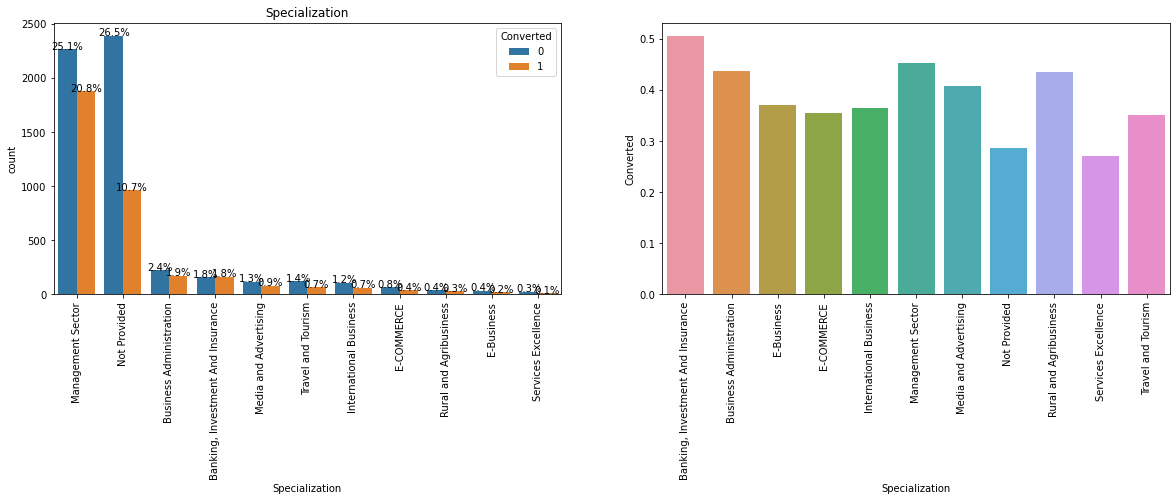

Last Notable Activity


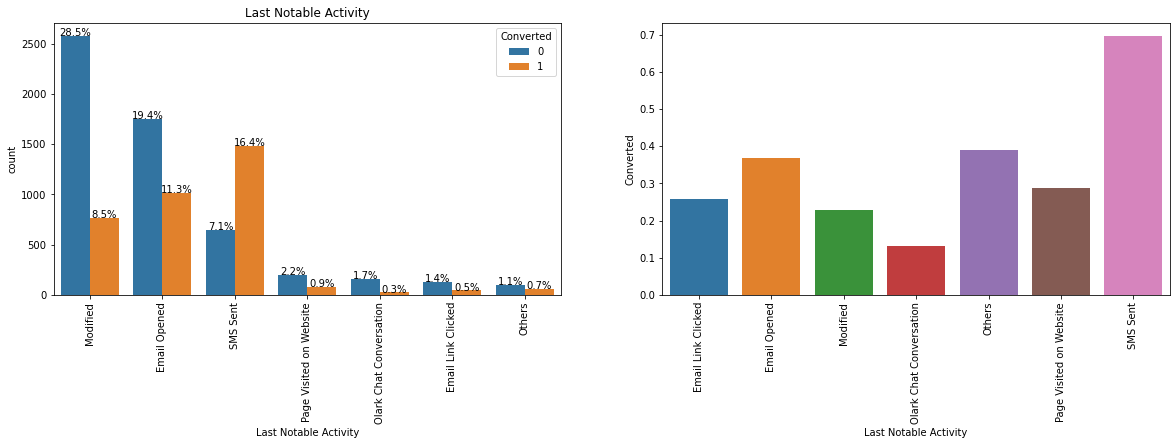

Connect_Info


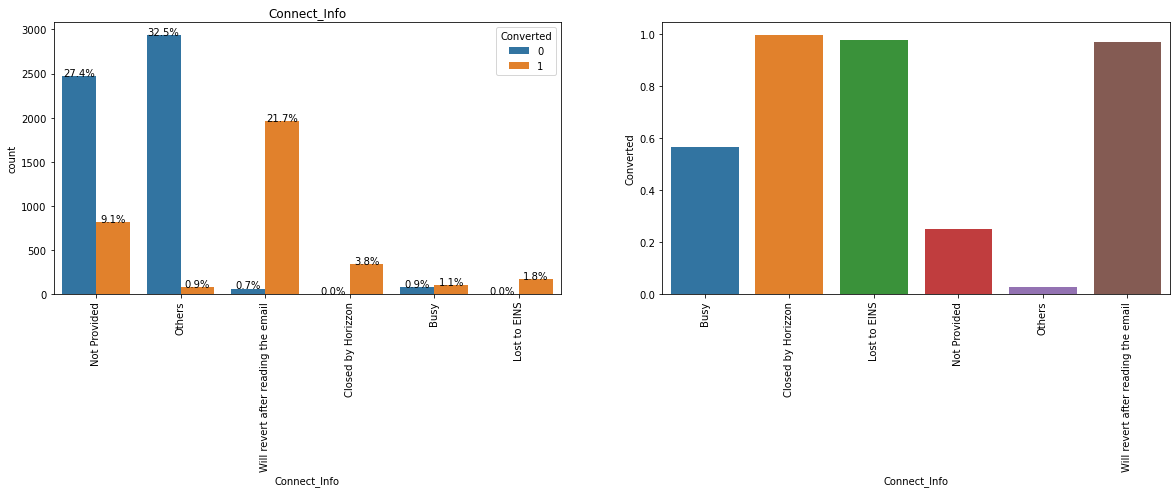

Lead Source


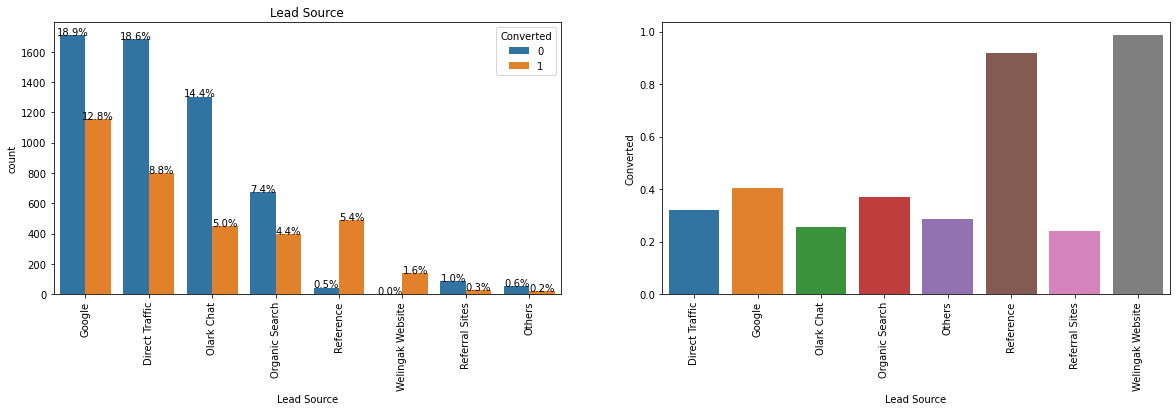

posx and posy should be finite values
posx and posy should be finite values


current_occupation


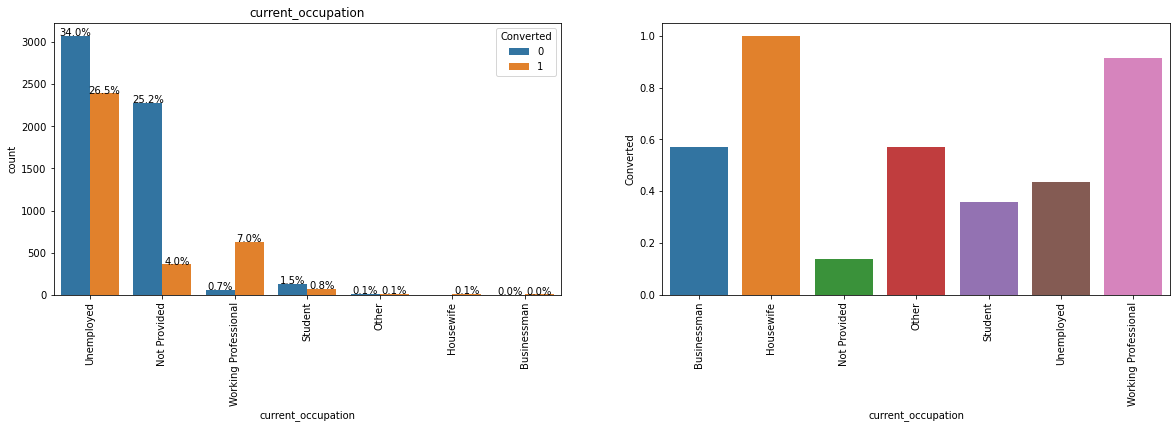

Last Activity


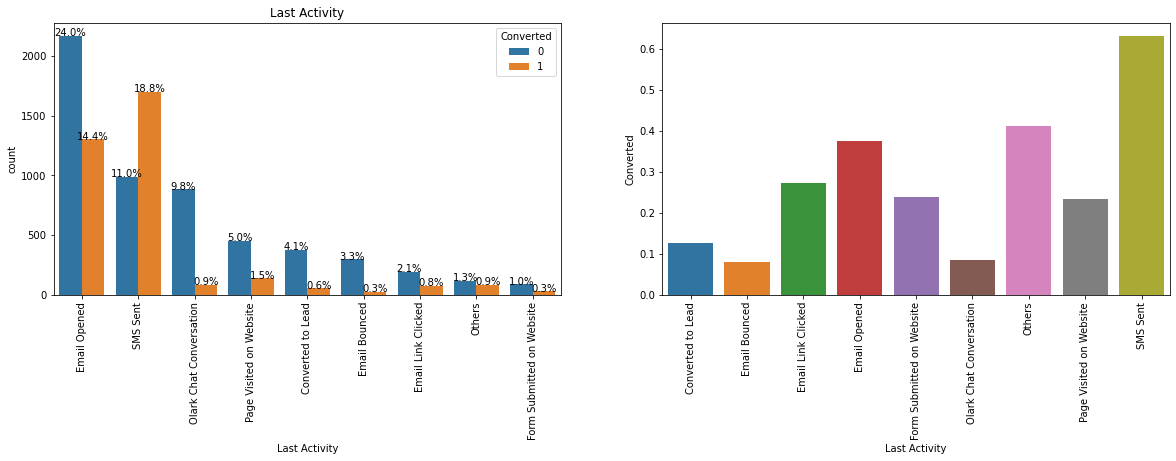

City


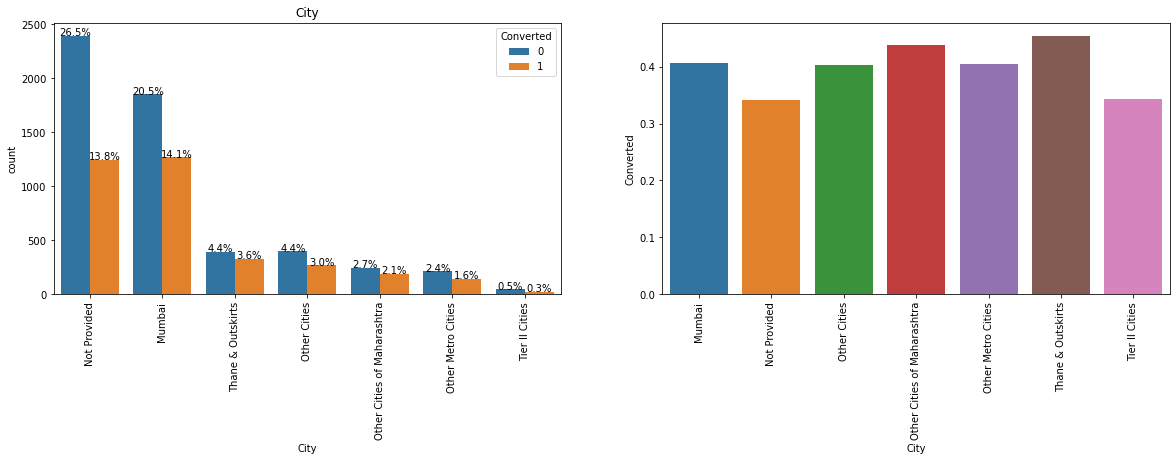

Lead Origin


posx and posy should be finite values
posx and posy should be finite values


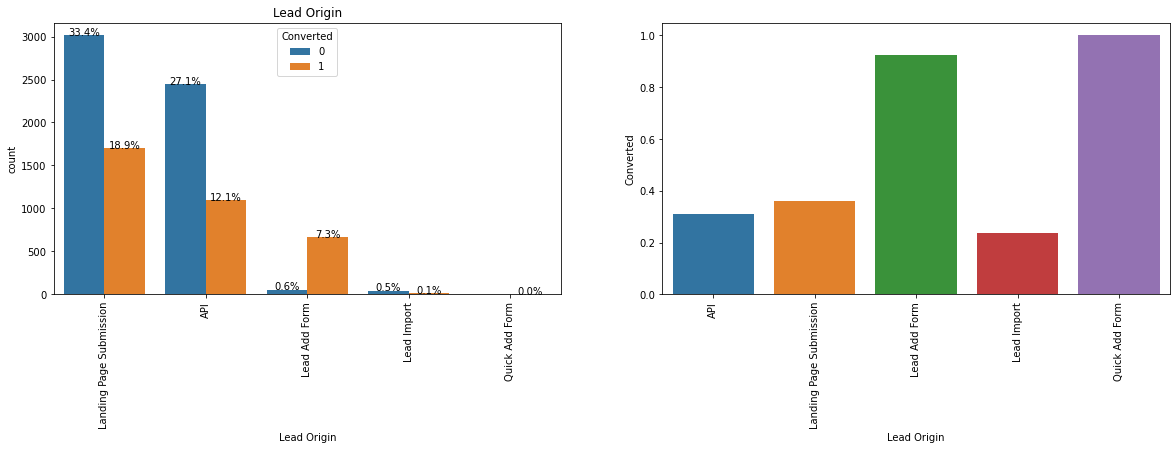

In [43]:
count_bar_categorical_col(dataframe, categorical_column, 'Converted')

In [44]:
# Connect_Info(Tags) does not seem to give proper information aboiut the leads 
# and the conversion.So we will drop the columns
dataframe.drop('Connect_Info', axis=1, inplace=True)

## So looking through the data:
- Lead Origin
    - Conversion is High wh filled the Landing Page Submission
- Last Activity/ Notable activity
    - People who have opened Email, have sent SMS have more chances or converting
- Specialization
   - the people under the Management Role , Banking sector convert more
- Occupation:
   - Unemployeed and Working Professionas have most converison
   - Housewife 100% conversion (count is very less)
- Lead Source
    - Welingak Website,Reference Have very high conversion
    - the other social media Leads conversion is also very low thus have been moved to others group
- TotalVisits/ Page vieews per visit 
    - People who visit more to the portal have a better chances of Converting
- City
    - Citites in Maharashtrs have high conversion rate almost 50%.... but mumbai has relatively less conversion

### Prepare Data for the modelling, create dummis

In [45]:
LeadOrigin= pd.get_dummies(dataframe['Lead Origin'], drop_first=True, prefix ='LeadOrigin',  prefix_sep='_')
LeadSource= pd.get_dummies(dataframe['Lead Source'], drop_first=True, prefix ='LeadSource',  prefix_sep='_')
City= pd.get_dummies(dataframe['City'], drop_first=True, prefix ='City',  prefix_sep='_')
current_occupation= pd.get_dummies(dataframe['current_occupation'], drop_first=True, prefix ='current_occupation',  prefix_sep='_')
Specialization= pd.get_dummies(dataframe['Specialization'], drop_first=True, prefix ='Specialization',  prefix_sep='_')
LastNotableActivity= pd.get_dummies(dataframe['Last Notable Activity'], drop_first=True, prefix ='LastNotableActivity',  prefix_sep='_')
LastActivity= pd.get_dummies(dataframe['Last Activity'], drop_first=True, prefix ='Last Activity',  prefix_sep='_')


dataframe_model= pd.concat([dataframe, LeadOrigin, City, current_occupation,
                            Specialization, LastNotableActivity, LeadSource, LastActivity], axis=1)


dataframe_model.drop('Lead Origin', axis=1, inplace=True)
dataframe_model.drop('City', axis=1, inplace=True)
dataframe_model.drop('current_occupation', axis=1, inplace=True)
dataframe_model.drop('Specialization', axis=1, inplace=True)
dataframe_model.drop('Last Notable Activity', axis=1, inplace=True)
dataframe_model.drop('Lead Source', axis=1, inplace=True)
dataframe_model.drop('Last Activity', axis=1, inplace=True)


<AxesSubplot:>

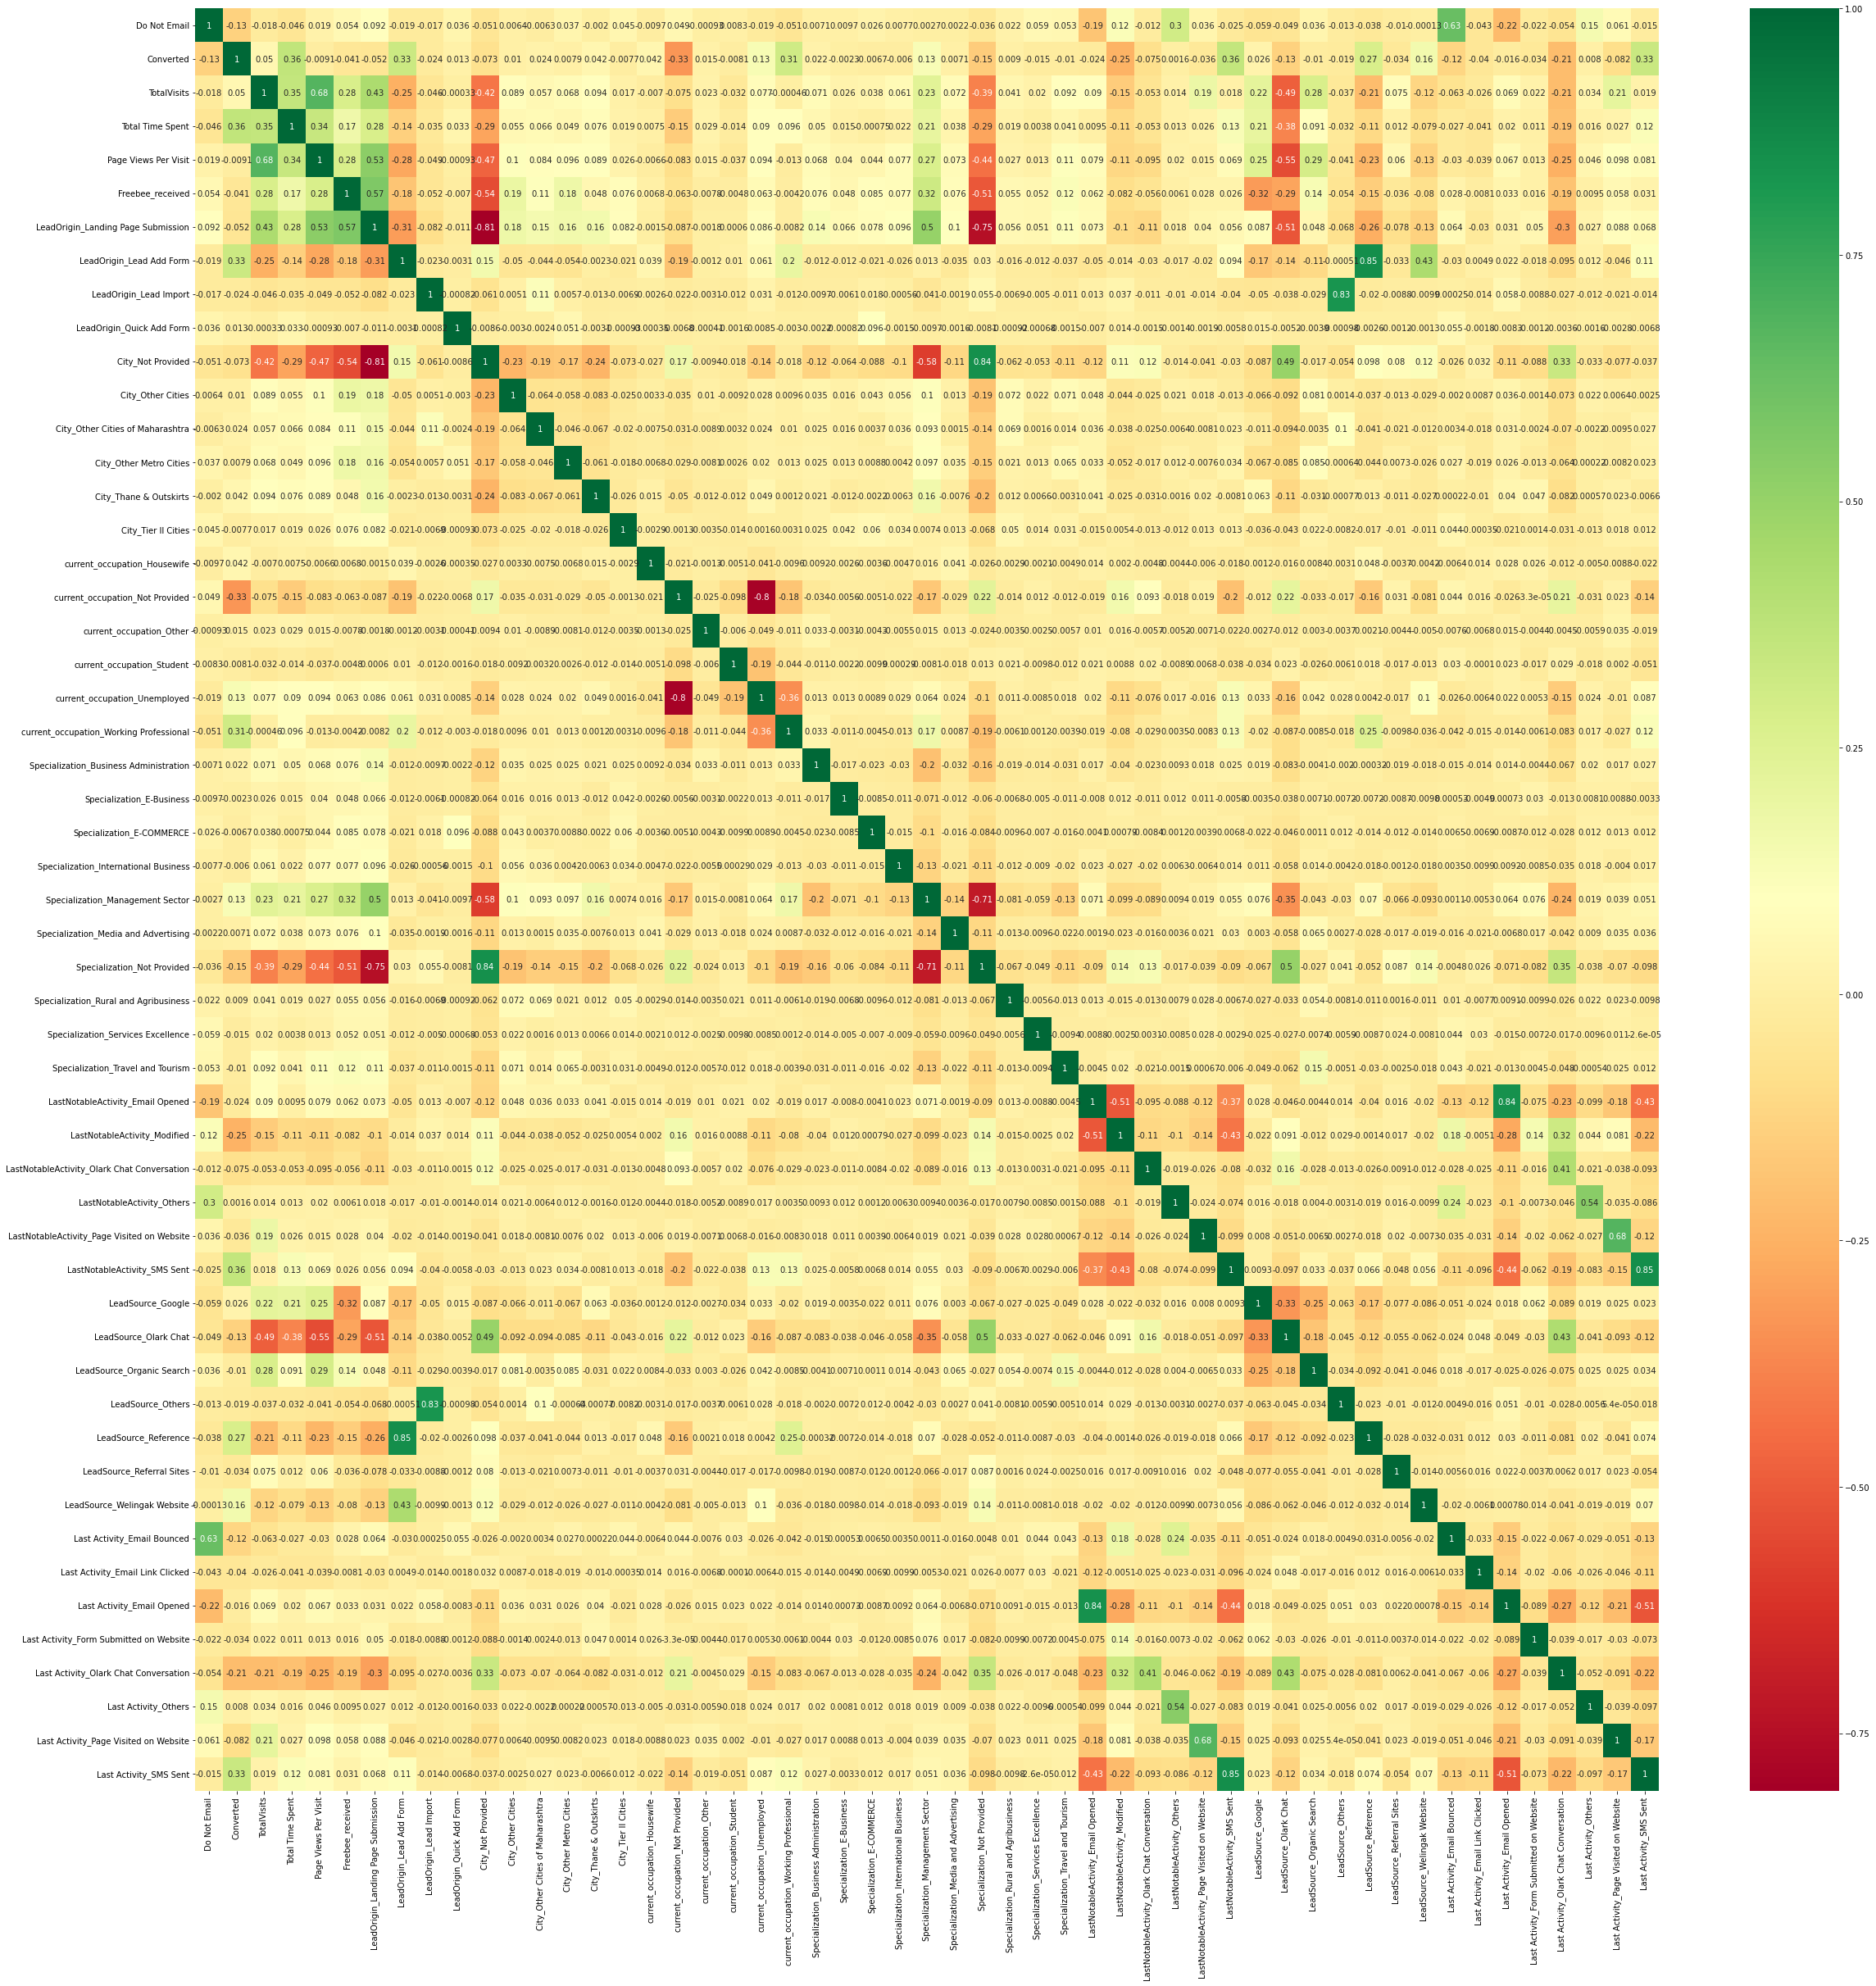

In [46]:
plt.figure(figsize=(40,40))
sns.heatmap(dataframe_model.corr(),annot=True, cmap='RdYlGn')

In [48]:
# getting the list of all highly corelaed feature columns
corr_mat=dataframe_model.corr().abs()

s = corr_mat.unstack()
so = s.sort_values(ascending=False)
so[52:100]


Last Activity_SMS Sent                       Last Activity_SMS Sent                         1.000000
                                             LastNotableActivity_SMS Sent                   0.852819
LastNotableActivity_SMS Sent                 Last Activity_SMS Sent                         0.852819
LeadOrigin_Lead Add Form                     LeadSource_Reference                           0.852805
LeadSource_Reference                         LeadOrigin_Lead Add Form                       0.852805
City_Not Provided                            Specialization_Not Provided                    0.844772
Specialization_Not Provided                  City_Not Provided                              0.844772
Last Activity_Email Opened                   LastNotableActivity_Email Opened               0.842017
LastNotableActivity_Email Opened             Last Activity_Email Opened                     0.842017
LeadSource_Others                            LeadOrigin_Lead Import                        

# Last Activity_Email Opened Following are the multicorelated columns
- LeadOrigin_Landing Page Submission
    - City_Not Provided
    - Specialization_Not Provided
    - Freebee_received
    - Page Views Per Visit
    - LeadSource_Olark Chat
    - Specialization_Management Sector
- City_Not Provided	
    - Specialization_Not Provided
	- Specialization_Management Sector
	- Freebee_received
- Last Activity_Email Opened	
    - LastNotableActivity_Email Opened
	- Last Activity_SMS Sent
- Page Views Per Visit	
    - TotalVisits
	- LeadSource_Olark Chat
- current_occupation_Unemployed ==	current_occupation_Not Provided
- Last Activity_Email Bounced	== Do Not Email
- Specialization_Not Provided ==	Freebee_received
- LastNotableActivity_Page Visited on Website ==	Last Activity_Page Visited on Website
- LastNotableActivity_SMS Sent	== Last Activity_SMS Sent
- LastNotableActivity_Email Opened ==	LastNotableActivity_Modified
- Last Activity_Others ==	LastNotableActivity_Others
- LeadOrigin_Lead Import ==	LeadSource_Others
- LeadOrigin_Lead Add Form ==	LeadSource_Reference
- Specialization_Management Sector ==	Specialization_Not Provided

In [49]:
# due to multicolinearity let su remove the following columns
columns=['LeadOrigin_Landing Page Submission', 
         'City_Not Provided', 
         'Last Activity_Email Opened', 
         'Page Views Per Visit',
         'LastNotableActivity_SMS Sent', 
         'LeadSource_Reference' , 
         'LeadOrigin_Lead Import', 
         'current_occupation_Not Provided',
         'Specialization_Not Provided', 
         'Last Activity_Page Visited on Website', 
         'Last Activity_Email Bounced', 'Last Activity_Others',
         'LastNotableActivity_Modified']
dataframe_model.drop(columns, axis=1,inplace=True)

###  Divide the data to train test data


In [50]:
y=dataframe_model.pop('Converted')
X=dataframe_model

In [51]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.3, random_state=42)

###  Feature Scaling


In [52]:
X_train.columns[X_train.nunique()>2]

Index(['Prospect ID', 'TotalVisits', 'Total Time Spent'], dtype='object')

In [53]:
# > will use standard Scalar for the Scaling
scalar=StandardScaler()
X_train[['TotalVisits', 'Total Time Spent']] = scalar.fit_transform(X_train[['TotalVisits', 'Total Time Spent']])

In [54]:
X_test[['TotalVisits', 'Total Time Spent']] = scalar.transform(X_test[['TotalVisits', 'Total Time Spent']])

In [55]:
X_train.pop('Prospect ID')
X_test.pop('Prospect ID')

2296    079882c4-cdcb-4dbd-abfd-cd2ef7b118dd
8697    f4c39bd8-50a5-464d-a518-b152a095fbfa
7378    162403e7-3cfb-4e4f-8e33-480afc41ffb6
8631    d1b1a897-16d8-4092-a72f-46c3ed1c0066
4799    565b4e96-015a-4f03-881f-8c32af5677dd
                        ...                 
8688    c9104c76-f478-4123-a0e8-b9b114ecf16a
7783    d05aea54-d7de-4b2c-9711-fcc6f0ad6ff7
6255    1de1f208-0561-4b10-9eee-8e0350525d0f
5390    2a2cd18b-ed1c-4635-afd5-d627161338d5
8539    f9402e24-c60f-4b34-ae77-1e9fdbcd066e
Name: Prospect ID, Length: 2709, dtype: object

### Feature Selection

In [56]:
# Let us conisider the top 25 features
log_re=LogisticRegression()
rfe=RFE(log_re,n_features_to_select=20)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [57]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 4),
 ('Total Time Spent', True, 1),
 ('Freebee_received', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Quick Add Form', False, 3),
 ('City_Other Cities', False, 11),
 ('City_Other Cities of Maharashtra', False, 17),
 ('City_Other Metro Cities', False, 8),
 ('City_Thane & Outskirts', False, 15),
 ('City_Tier II Cities', False, 16),
 ('current_occupation_Housewife', True, 1),
 ('current_occupation_Other', True, 1),
 ('current_occupation_Student', True, 1),
 ('current_occupation_Unemployed', True, 1),
 ('current_occupation_Working Professional', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_E-Business', False, 13),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_International Business', False, 9),
 ('Specialization_Management Sector', True, 1),
 ('Specialization_Media and Advertising', False, 19),
 ('Specialization_Rural and Agribusiness', True, 1),
 ('Specialization_Servi

In [58]:
col_list=X_train.columns[rfe.support_]

In [59]:
def viff(col_list):
    vif=pd.DataFrame()
    vif['features']= col_list
    vif['VIF']=[variance_inflation_factor(X_train[col_list],i) for i in range(len(col_list))]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF', ascending=False)
    return vif

### Logistic Modelling Using statmodels

### Model 1

In [60]:
logm1=sm.GLM(y_train,sm.add_constant(X_train[col_list]), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.5
Date:                Sun, 10 Jul 2022   Deviance:                       5080.9
Time:                        16:20:11   Pearson chi2:                 6.28e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4132
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -2.8599      0.120    -23.799      0.000      -3.095      -2.624
Do Not Email                                   -1.5448      0.186     -8.295      0.000      -1.910      -1.180
Total Time Spent                                1.1153      0.041     26.971      0.000       1.034       1.196
Freebee_received                               -0.4272      0.084     -5.098      0.000      -0.591      -0.263
LeadOrigin_Lead Add Form                        3.3663      0.197     17.048      0.000       2.979       3.753
current_occupation_Housewife                   24.2420   1.47e+04      0.002      0.999   -2.88e+04    2.88e+04
current_occupation_Other                        1.7376      0.670      2.592      0.010       0.424       3.051
current_occupation_Student                      1.1249      0.236      4.775      0.000       0.663       1.587
current_occupation_Unemployed                   1.2497      0.090     13.952      0.000       1.074       1.425
current_occupation_Working Professional         3.7547      0.213     17.632      0.000       3.337       4.172
Specialization_Business Administration          0.3046      0.182      1.676      0.094      -0.052       0.661
Specialization_E-COMMERCE                       0.6073      0.319      1.904      0.057      -0.018       1.233
Specialization_Management Sector                0.3408      0.083      4.119      0.000       0.179       0.503
Specialization_Rural and Agribusiness           0.3619      0.422      0.858      0.391      -0.464       1.188
LastNotableActivity_Email Opened                0.6081      0.096      6.341      0.000       0.420       0.796
LastNotableActivity_Olark Chat Conversation     0.4516      0.361      1.251      0.211      -0.256       1.159
LastNotableActivity_Others                      1.5318      0.293      5.227      0.000       0.957       2.106
LeadSource_Olark Chat                           1.4096      0.115     12.250      0.000       1.184       1.635
LeadSource_Welingak Website                     2.2096      0.742      2.979      0.003       0.756       3.664
Last Activity_Olark Chat Conversation          -0.9654      0.201     -4.810      0.000      -1.359      -0.572
Last Activity_SMS Sent                          1.7645      0.097     18.242      0.000       1.575       1.954
===============================================================================================================
"""

### Model 2

In [61]:
col_list=col_list.drop('current_occupation_Housewife')
logm2= sm.GLM(y_train, (sm.add_constant(X_train[col_list])), family=sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2553.1
Date:                Sun, 10 Jul 2022   Deviance:                       5106.3
Time:                        16:20:15   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4109
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -2.8164      0.119    -23.672      0.000      -3.050      -2.583
Do Not Email                                   -1.5522      0.186     -8.345      0.000      -1.917      -1.188
Total Time Spent                                1.1125      0.041     26.989      0.000       1.032       1.193
Freebee_received                               -0.4158      0.083     -4.980      0.000      -0.579      -0.252
LeadOrigin_Lead Add Form                        3.4121      0.198     17.258      0.000       3.025       3.800
current_occupation_Other                        1.6916      0.670      2.524      0.012       0.378       3.005
current_occupation_Student                      1.0854      0.235      4.613      0.000       0.624       1.547
current_occupation_Unemployed                   1.2119      0.089     13.681      0.000       1.038       1.385
current_occupation_Working Professional         3.7135      0.212     17.483      0.000       3.297       4.130
Specialization_Business Administration          0.3260      0.181      1.801      0.072      -0.029       0.681
Specialization_E-COMMERCE                       0.5973      0.318      1.876      0.061      -0.027       1.221
Specialization_Management Sector                0.3419      0.083      4.142      0.000       0.180       0.504
Specialization_Rural and Agribusiness           0.3536      0.421      0.840      0.401      -0.471       1.178
LastNotableActivity_Email Opened                0.5993      0.095      6.277      0.000       0.412       0.786
LastNotableActivity_Olark Chat Conversation     0.4465      0.361      1.238      0.216      -0.260       1.153
LastNotableActivity_Others                      1.5200      0.293      5.191      0.000       0.946       2.094
LeadSource_Olark Chat                           1.4012      0.115     12.212      0.000       1.176       1.626
LeadSource_Welingak Website                     2.1683      0.742      2.922      0.003       0.714       3.623
Last Activity_Olark Chat Conversation          -0.9784      0.200     -4.882      0.000      -1.371      -0.586
Last Activity_SMS Sent                          1.7455      0.096     18.125      0.000       1.557       1.934
===============================================================================================================
"""

## Model 3

In [62]:
col_list=col_list.drop('Specialization_Rural and Agribusiness')
logm3= sm.GLM(y_train, (sm.add_constant(X_train[col_list])), family=sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2553.5
Date:                Sun, 10 Jul 2022   Deviance:                       5107.0
Time:                        16:20:27   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4108
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -2.8111      0.119    -23.670      0.000      -3.044      -2.578
Do Not Email                                   -1.5529      0.186     -8.348      0.000      -1.918      -1.188
Total Time Spent                                1.1132      0.041     27.009      0.000       1.032       1.194
Freebee_received                               -0.4106      0.083     -4.931      0.000      -0.574      -0.247
LeadOrigin_Lead Add Form                        3.4135      0.198     17.266      0.000       3.026       3.801
current_occupation_Other                        1.6927      0.670      2.526      0.012       0.379       3.006
current_occupation_Student                      1.0866      0.235      4.622      0.000       0.626       1.547
current_occupation_Unemployed                   1.2132      0.089     13.697      0.000       1.040       1.387
current_occupation_Working Professional         3.7150      0.212     17.495      0.000       3.299       4.131
Specialization_Business Administration          0.3175      0.181      1.757      0.079      -0.037       0.672
Specialization_E-COMMERCE                       0.5884      0.318      1.849      0.064      -0.035       1.212
Specialization_Management Sector                0.3332      0.082      4.070      0.000       0.173       0.494
LastNotableActivity_Email Opened                0.5997      0.095      6.282      0.000       0.413       0.787
LastNotableActivity_Olark Chat Conversation     0.4456      0.361      1.236      0.217      -0.261       1.152
LastNotableActivity_Others                      1.5228      0.293      5.198      0.000       0.949       2.097
LeadSource_Olark Chat                           1.3982      0.115     12.196      0.000       1.173       1.623
LeadSource_Welingak Website                     2.1623      0.742      2.914      0.004       0.708       3.617
Last Activity_Olark Chat Conversation          -0.9808      0.200     -4.895      0.000      -1.373      -0.588
Last Activity_SMS Sent                          1.7442      0.096     18.119      0.000       1.555       1.933
===============================================================================================================
"""

## Model 4

In [63]:
col_list=col_list.drop('LastNotableActivity_Olark Chat Conversation')
logm4= sm.GLM(y_train, (sm.add_constant(X_train[col_list])), family=sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2554.2
Date:                Sun, 10 Jul 2022   Deviance:                       5108.4
Time:                        16:20:36   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4107
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.8104      0.119    -23.670      0.000      -3.043      -2.578
Do Not Email                               -1.5513      0.186     -8.337      0.000      -1.916      -1.187
Total Time Spent                            1.1147      0.041     27.054      0.000       1.034       1.195
Freebee_received                           -0.4081      0.083     -4.904      0.000      -0.571      -0.245
LeadOrigin_Lead Add Form                    3.4158      0.198     17.285      0.000       3.028       3.803
current_occupation_Other                    1.6799      0.669      2.512      0.012       0.369       2.991
current_occupation_Student                  1.0842      0.235      4.613      0.000       0.624       1.545
current_occupation_Unemployed               1.2113      0.089     13.680      0.000       1.038       1.385
current_occupation_Working Professional     3.7135      0.212     17.501      0.000       3.298       4.129
Specialization_Business Administration      0.3186      0.181      1.763      0.078      -0.036       0.673
Specialization_E-COMMERCE                   0.5843      0.318      1.836      0.066      -0.040       1.208
Specialization_Management Sector            0.3322      0.082      4.058      0.000       0.172       0.493
LastNotableActivity_Email Opened            0.6001      0.095      6.285      0.000       0.413       0.787
LastNotableActivity_Others                  1.5218      0.293      5.194      0.000       0.948       2.096
LeadSource_Olark Chat                       1.3979      0.115     12.196      0.000       1.173       1.623
LeadSource_Welingak Website                 2.1768      0.743      2.932      0.003       0.721       3.632
Last Activity_Olark Chat Conversation      -0.8810      0.179     -4.927      0.000      -1.231      -0.531
Last Activity_SMS Sent                      1.7443      0.096     18.118      0.000       1.556       1.933
===========================================================================================================
"""

## Model 5

In [64]:
col_list=col_list.drop('Specialization_Business Administration')
logm5= sm.GLM(y_train, (sm.add_constant(X_train[col_list])), family=sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.8
Date:                Sun, 10 Jul 2022   Deviance:                       5111.5
Time:                        16:20:40   Pearson chi2:                 6.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4104
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.7825      0.117    -23.699      0.000      -3.013      -2.552
Do Not Email                               -1.5457      0.186     -8.304      0.000      -1.911      -1.181
Total Time Spent                            1.1145      0.041     27.068      0.000       1.034       1.195
Freebee_received                           -0.3929      0.083     -4.745      0.000      -0.555      -0.231
LeadOrigin_Lead Add Form                    3.4097      0.197     17.269      0.000       3.023       3.797
current_occupation_Other                    1.7606      0.665      2.649      0.008       0.458       3.063
current_occupation_Student                  1.0903      0.235      4.640      0.000       0.630       1.551
current_occupation_Unemployed               1.2167      0.088     13.749      0.000       1.043       1.390
current_occupation_Working Professional     3.7283      0.212     17.588      0.000       3.313       4.144
Specialization_E-COMMERCE                   0.5426      0.317      1.710      0.087      -0.079       1.165
Specialization_Management Sector            0.2927      0.079      3.723      0.000       0.139       0.447
LastNotableActivity_Email Opened            0.6021      0.095      6.309      0.000       0.415       0.789
LastNotableActivity_Others                  1.5163      0.293      5.177      0.000       0.942       2.090
LeadSource_Olark Chat                       1.3734      0.114     12.092      0.000       1.151       1.596
LeadSource_Welingak Website                 2.1590      0.742      2.908      0.004       0.704       3.614
Last Activity_Olark Chat Conversation      -0.8884      0.179     -4.972      0.000      -1.239      -0.538
Last Activity_SMS Sent                      1.7436      0.096     18.121      0.000       1.555       1.932
===========================================================================================================
"""

## Model 6

In [65]:
col_list=col_list.drop('Specialization_E-COMMERCE')
logm6= sm.GLM(y_train, (sm.add_constant(X_train[col_list])), family=sm.families.Binomial())
final_model=logm6.fit()
final_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.2
Date:                Sun, 10 Jul 2022   Deviance:                       5114.3
Time:                        16:20:57   Pearson chi2:                 6.33e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4101
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.7676      0.117    -23.672      0.000      -2.997      -2.538
Do Not Email                               -1.5437      0.186     -8.302      0.000      -1.908      -1.179
Total Time Spent                            1.1122      0.041     27.053      0.000       1.032       1.193
Freebee_received                           -0.3784      0.082     -4.597      0.000      -0.540      -0.217
LeadOrigin_Lead Add Form                    3.4083      0.197     17.261      0.000       3.021       3.795
current_occupation_Other                    1.7588      0.664      2.650      0.008       0.458       3.060
current_occupation_Student                  1.0900      0.235      4.647      0.000       0.630       1.550
current_occupation_Unemployed               1.2162      0.088     13.743      0.000       1.043       1.390
current_occupation_Working Professional     3.7343      0.212     17.604      0.000       3.319       4.150
Specialization_Management Sector            0.2731      0.078      3.514      0.000       0.121       0.425
LastNotableActivity_Email Opened            0.5998      0.095      6.290      0.000       0.413       0.787
LastNotableActivity_Others                  1.5112      0.292      5.170      0.000       0.938       2.084
LeadSource_Olark Chat                       1.3604      0.113     12.017      0.000       1.139       1.582
LeadSource_Welingak Website                 2.1459      0.742      2.890      0.004       0.691       3.601
Last Activity_Olark Chat Conversation      -0.8875      0.178     -4.972      0.000      -1.237      -0.538
Last Activity_SMS Sent                      1.7446      0.096     18.137      0.000       1.556       1.933
===========================================================================================================
"""

In [66]:
viff(col_list)

,features,VIF
6,current_occupation_Unemployed,2.52
8,Specialization_Management Sector,2.17
11,LeadSource_Olark Chat,1.81
14,Last Activity_SMS Sent,1.79
9,LastNotableActivity_Email Opened,1.73
2,Freebee_received,1.70
3,LeadOrigin_Lead Add Form,1.61
13,Last Activity_Olark Chat Conversation,1.47
7,current_occupation_Working Professional,1.39
12,LeadSource_Welingak Website,1.32



#### We will consider this as the final model

- VIF score is low with <5
- P value is significant <0.05

### 11. Model Accuracy estimation
- To find the difference bewteen the the actual Target value and the predicted target value
- We will use the Model 6 for the further Modelling Process

In [67]:
y_train_predict=final_model.predict(sm.add_constant(X_train[col_list]))

In [68]:
Conversion_train=pd.DataFrame()
Conversion_train['Y_Actual']=y_train
Conversion_train['y_Predicted']=y_train_predict
Conversion_train['LeadID']=y_train.index

In [69]:
#  Let us calculate the best threshold
threshold=[float(i)/100 for i in range(100)]
for i in threshold:
    Conversion_train[i]=Conversion_train['y_Predicted'].map(lambda x: 1 if x>i else 0)

In [70]:
thresholdtable=pd.DataFrame(columns=['threshold','accuracy','confusion', 'f1', 'precision','recall','roc_auc_score'])
for i in threshold:
    accuracy=accuracy_score(Conversion_train['Y_Actual'],Conversion_train[i] )
    confusion=confusion_matrix(Conversion_train['Y_Actual'],Conversion_train[i])
    f1=f1_score(Conversion_train['Y_Actual'],Conversion_train[i])
    precision=precision_score(Conversion_train['Y_Actual'],Conversion_train[i])
    recall=recall_score(Conversion_train['Y_Actual'],Conversion_train[i])
    a=roc_auc_score(Conversion_train['Y_Actual'],Conversion_train[i])
    thresholdtable.loc[i]=[i,accuracy, confusion, f1, precision, recall,a]

In [71]:
thresholdtable

,threshold,accuracy,confusion,f1,precision,recall,roc_auc_score
0.00,0.00,0.389557,"[[0, 3858], [0, 2462]]",0.560692,0.389557,1.000000,0.500000
0.01,0.01,0.401266,"[[74, 3784], [0, 2462]]",0.565457,0.394172,1.000000,0.509590
0.02,0.02,0.420253,"[[194, 3664], [0, 2462]]",0.573358,0.401894,1.000000,0.525143
0.03,0.03,0.443038,"[[342, 3516], [4, 2458]]",0.582741,0.411450,0.998375,0.543511
0.04,0.04,0.511076,"[[781, 3077], [13, 2449]]",0.613170,0.443178,0.994720,0.598578
0.05,0.05,0.528165,"[[896, 2962], [20, 2442]]",0.620900,0.451887,0.991877,0.612061
0.06,0.06,0.549209,"[[1038, 2820], [29, 2433]]",0.630719,0.463164,0.988221,0.628636
0.07,0.07,0.565823,"[[1147, 2711], [33, 2429]]",0.639042,0.472568,0.986596,0.641950
0.08,0.08,0.581171,"[[1250, 2608], [39, 2423]]",0.646737,0.481614,0.984159,0.654081
0.09,0.09,0.609494,"[[1435, 2423], [45, 2417]]",0.662010,0.499380,0.981722,0.676838


In [72]:
abs(thresholdtable['precision']-thresholdtable['recall']).sort_values().head(10)

0.42    0.001855
0.43    0.011193
0.41    0.014449
0.44    0.024426
0.40    0.025944
0.45    0.035561
0.39    0.036414
0.46    0.045728
0.38    0.046411
0.47    0.058087
dtype: float64

### Based on the Precision, recall tradeoff , lets consider the threshold to be at 0.42

In [74]:
thresholdtable[thresholdtable['threshold']==0.42]

,threshold,accuracy,confusion,f1,precision,recall,roc_auc_score
0.42,0.42,0.814557,"[[3269, 589], [583, 1879]]",0.762272,0.761345,0.763201,0.805265


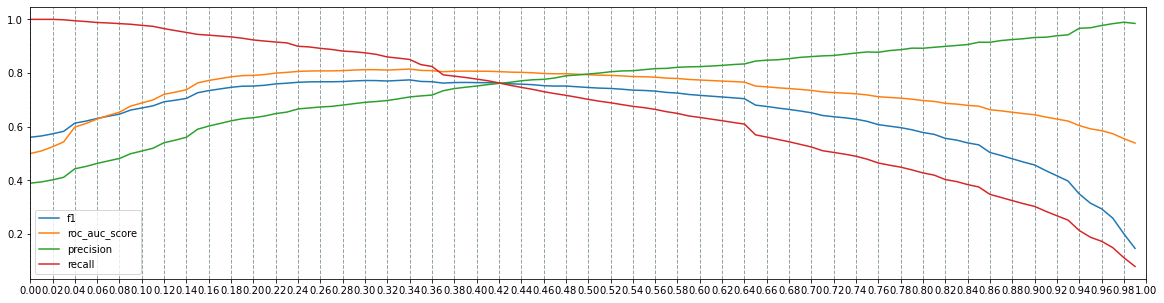

In [75]:
#  ROC AUC Score and the ROC curve
plt.figure(figsize=(20,5))
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='x', alpha=1)

a=['f1','roc_auc_score', 'precision','recall']
for i in a:
    plt.plot(thresholdtable['threshold'], thresholdtable[i],label=i)
    plt.legend()
    plt.xlim(0, 1)
    plt.locator_params(axis='x', nbins=50)


Text(0, 0.5, 'TPR')

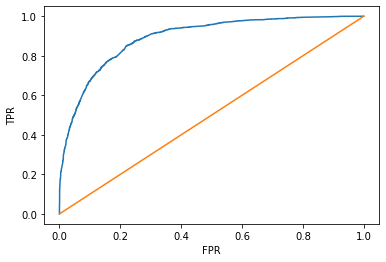

In [76]:
fpr, tpr, threshold=roc_curve(Conversion_train['Y_Actual'], Conversion_train['y_Predicted'], drop_intermediate=False)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')

In [77]:
# Calculate the Highest ROC Score
thresholdtable[thresholdtable['roc_auc_score']== max(thresholdtable['roc_auc_score'])]

,threshold,accuracy,confusion,f1,precision,recall,roc_auc_score
0.34,0.34,0.806962,"[[3006, 852], [368, 2094]]",0.774408,0.710794,0.850528,0.814844


### The recall is less with Precision and recall tradeoff  at 0.42 --- 76 %
### So, We will go with the roc score theshold ie 0.34-- Recall value is 85%

### Prediction on the test data

In [78]:
y_test_predict=final_model.predict(sm.add_constant(X_test[col_list]))

In [79]:
Conversion_test=pd.DataFrame()
Conversion_test['Y_Actual']=y_test
Conversion_test['Y_Proba']=y_test_predict
Conversion_test['LeadID']=y_test.index


In [81]:
# Consider Threshold 0.34
Conversion_test['Y_Predicted']=Conversion_test['Y_Proba'].map(lambda x: 1 if x>0.34 else 0)

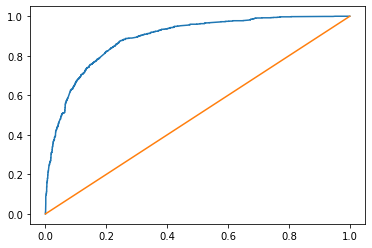

In [82]:
fpr, tpr, threshold=roc_curve(Conversion_test['Y_Actual'], Conversion_test['Y_Proba'], drop_intermediate=False)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])

In [83]:

accuracy=accuracy_score(Conversion_test['Y_Actual'],Conversion_test['Y_Predicted'] )
confusion=confusion_matrix(Conversion_test['Y_Actual'],Conversion_test['Y_Predicted'])
f1=f1_score(Conversion_test['Y_Actual'],Conversion_test['Y_Predicted'])
precision=precision_score(Conversion_test['Y_Actual'],Conversion_test['Y_Predicted'])
recall=recall_score(Conversion_test['Y_Actual'],Conversion_test['Y_Predicted'])
ARS=roc_auc_score(Conversion_test['Y_Actual'], Conversion_test['Y_Predicted'])
test_estimates=pd.DataFrame(columns=['accuracy', 'confusion','f1','precision','recall', 'roc_auc_score'] )
test_estimates.loc[0]=[accuracy, confusion, f1, precision, recall,ARS]


In [84]:
# Final Results- train
thresholdtable[thresholdtable['threshold']==0.34]

,threshold,accuracy,confusion,f1,precision,recall,roc_auc_score
0.34,0.34,0.806962,"[[3006, 852], [368, 2094]]",0.774408,0.710794,0.850528,0.814844


In [85]:
# Final Results- test
test_estimates

,accuracy,confusion,f1,precision,recall,roc_auc_score
0,0.803987,"[[1325, 369], [162, 853]]",0.762629,0.698036,0.840394,0.811283


- There difference is low between the test and the train data accuracy
- As ROC is more than 80% so the model can be considered as a good model
- Recall is also >80%

###### The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

In [86]:
# To identify the Score for the Lead
Conversion_test['score']= round(Conversion_test['Y_Proba']*100,1)
Conversion_test

,Y_Actual,Y_Proba,LeadID,Y_Predicted,score
2296,1,0.902112,2296,1,90.2
8697,0,0.417938,8697,1,41.8
7378,0,0.214725,7378,0,21.5
8631,0,0.741851,8631,1,74.2
4799,1,0.929529,4799,1,93.0
...,...,...,...,...,...
8688,0,0.059527,8688,0,6.0
7783,0,0.174600,7783,0,17.5
6255,1,0.640227,6255,1,64.0
5390,1,0.947713,5390,1,94.8


<AxesSubplot:>

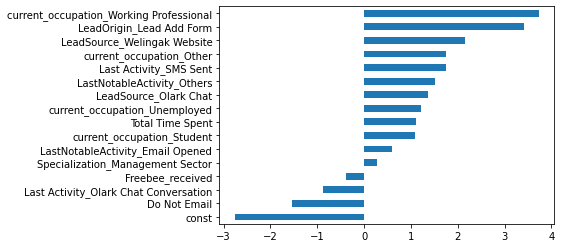

In [87]:
final_model.params.sort_values().plot.barh()